# Define Problem
The task is to cluster stores given some features

In [152]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn as sk

In [153]:
# Understand Data 
dfa = pd.read_csv('Walmart_MBA.csv')

In [154]:
dfa.head()

Store     Date IsHoliday  Temperature  Fuel_Price         CPI  \
0   26.0  8/26/11     False        61.10       3.796  136.213613   
1   34.0  3/25/11     False        53.11       3.480  128.616064   
2   21.0  12/3/10     False        50.43       2.708  211.265543   
3    8.0  9/17/10     False        75.32       2.582  214.878556   
4   19.0  5/18/12     False        58.81       4.029  138.106581   

   Unemployment      Size  Weekly_Sales  
0         7.767  152513.0     593115.51  
1        10.398  158114.0     519134.07  
2         8.163  140167.0     612096.28  
3         6.315  155078.0     517038.77  
4         8.150  203819.0     668089.88

In [155]:
# Extract days from Date
dfa['Date'] = pd.to_datetime(dfa['Date'])
dfa['Date_Delta'] = (dfa['Date'] - dfa['Date'].min()).dt.days
dfa.drop('Date', axis = 1, inplace = True)
dfa.head()

Store IsHoliday  Temperature  Fuel_Price         CPI  Unemployment  \
0   26.0     False        61.10       3.796  136.213613         7.767   
1   34.0     False        53.11       3.480  128.616064        10.398   
2   21.0     False        50.43       2.708  211.265543         8.163   
3    8.0     False        75.32       2.582  214.878556         6.315   
4   19.0     False        58.81       4.029  138.106581         8.150   

       Size  Weekly_Sales  Date_Delta  
0  152513.0     593115.51         567  
1  158114.0     519134.07         413  
2  140167.0     612096.28         301  
3  155078.0     517038.77         224  
4  203819.0     668089.88         833

In [156]:
dfa.describe() 

Store  Temperature   Fuel_Price          CPI  Unemployment  \
count  6433.000000  6434.000000  6434.000000  6435.000000   6435.000000   
mean     23.003575    60.660788     3.358657   171.578394      7.999151   
std      12.987945    18.444802     0.459037    39.356712      1.875885   
min       1.000000    -2.060000     2.472000   126.064000      3.879000   
25%      12.000000    47.445000     2.933000   131.735000      6.891000   
50%      23.000000    62.665000     3.446500   182.616521      7.874000   
75%      34.000000    74.930000     3.735000   212.743293      8.622000   
max      45.000000   100.140000     4.468000   227.232807     14.313000   

                Size  Weekly_Sales   Date_Delta  
count    6434.000000  6.435000e+03  6435.000000  
mean   130275.853746  7.015595e+05   497.000000  
std     63114.893569  3.915942e+05   288.979199  
min     34875.000000  6.898211e+04     0.000000  
25%     70713.000000  3.756139e+05   245.000000  
50%    126512.000000  6.396524e+05   497.000000  
75%    202307.000000  9.588074e+05   749.000000  
max    219622.000000  2.773216e+06   994.000000

In [157]:
dfa.isnull().sum()
dfa.dropna(inplace = True)

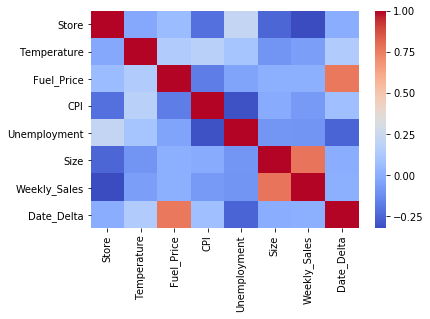

In [158]:
# Uncover Correlations
dfa.corr()
sns.heatmap(dfa.corr(),cmap='coolwarm')

In [159]:
dfa.columns

Index(['Store', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Size', 'Weekly_Sales', 'Date_Delta'],
      dtype='object')

In [160]:
# Extract numerical variables only for clustering with Kmeans

df = dfa[['Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Size', 'Weekly_Sales', 'Date_Delta']]

In [161]:
#Scale data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df)

# Clustering

In [162]:
from sklearn.cluster import KMeans

In [163]:
top = 20
SSE =[]
for cluster in range(1,top): 
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(scaled)
    SSE.append(kmeans.inertia_)

In [164]:
frame = pd.DataFrame({'Cluster':range(1,top), 'SSE': SSE})

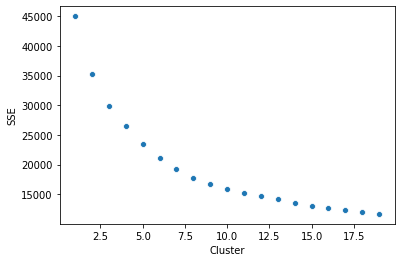

In [165]:
sns.scatterplot(data = frame, x = 'Cluster', y = 'SSE', marker = 'o')

## Re-run Kmeans with optimal 'K'##

In [190]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(scaled)
predictions = kmeans.predict(scaled)

In [191]:
#dfa = pd.DataFrame(scaled_dfc)
dfa['cluster'] = predictions
dfa.head()

Store IsHoliday  Temperature  Fuel_Price         CPI  Unemployment  \
0   26.0     False        61.10       3.796  136.213613         7.767   
1   34.0     False        53.11       3.480  128.616064        10.398   
2   21.0     False        50.43       2.708  211.265543         8.163   
3    8.0     False        75.32       2.582  214.878556         6.315   
4   19.0     False        58.81       4.029  138.106581         8.150   

       Size  Weekly_Sales  Date_Delta  hCluster  cluster  
0  152513.0     593115.51         567         1        3  
1  158114.0     519134.07         413         5        1  
2  140167.0     612096.28         301         1        4  
3  155078.0     517038.77         224         5        4  
4  203819.0     668089.88         833         1        3

Text(0.5, 1.0, 'Weekly Sales vs Days')

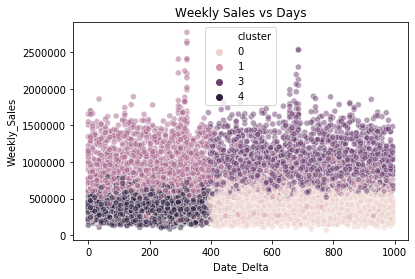

In [192]:
sns.scatterplot( y = 'Weekly_Sales', x = 'Date_Delta',data=dfa, 
                hue = dfa['cluster'], alpha = 0.5)
plt.ylabel('Weekly_Sales')
plt.xlabel('Date_Delta')
plt.title('Weekly Sales vs Days')

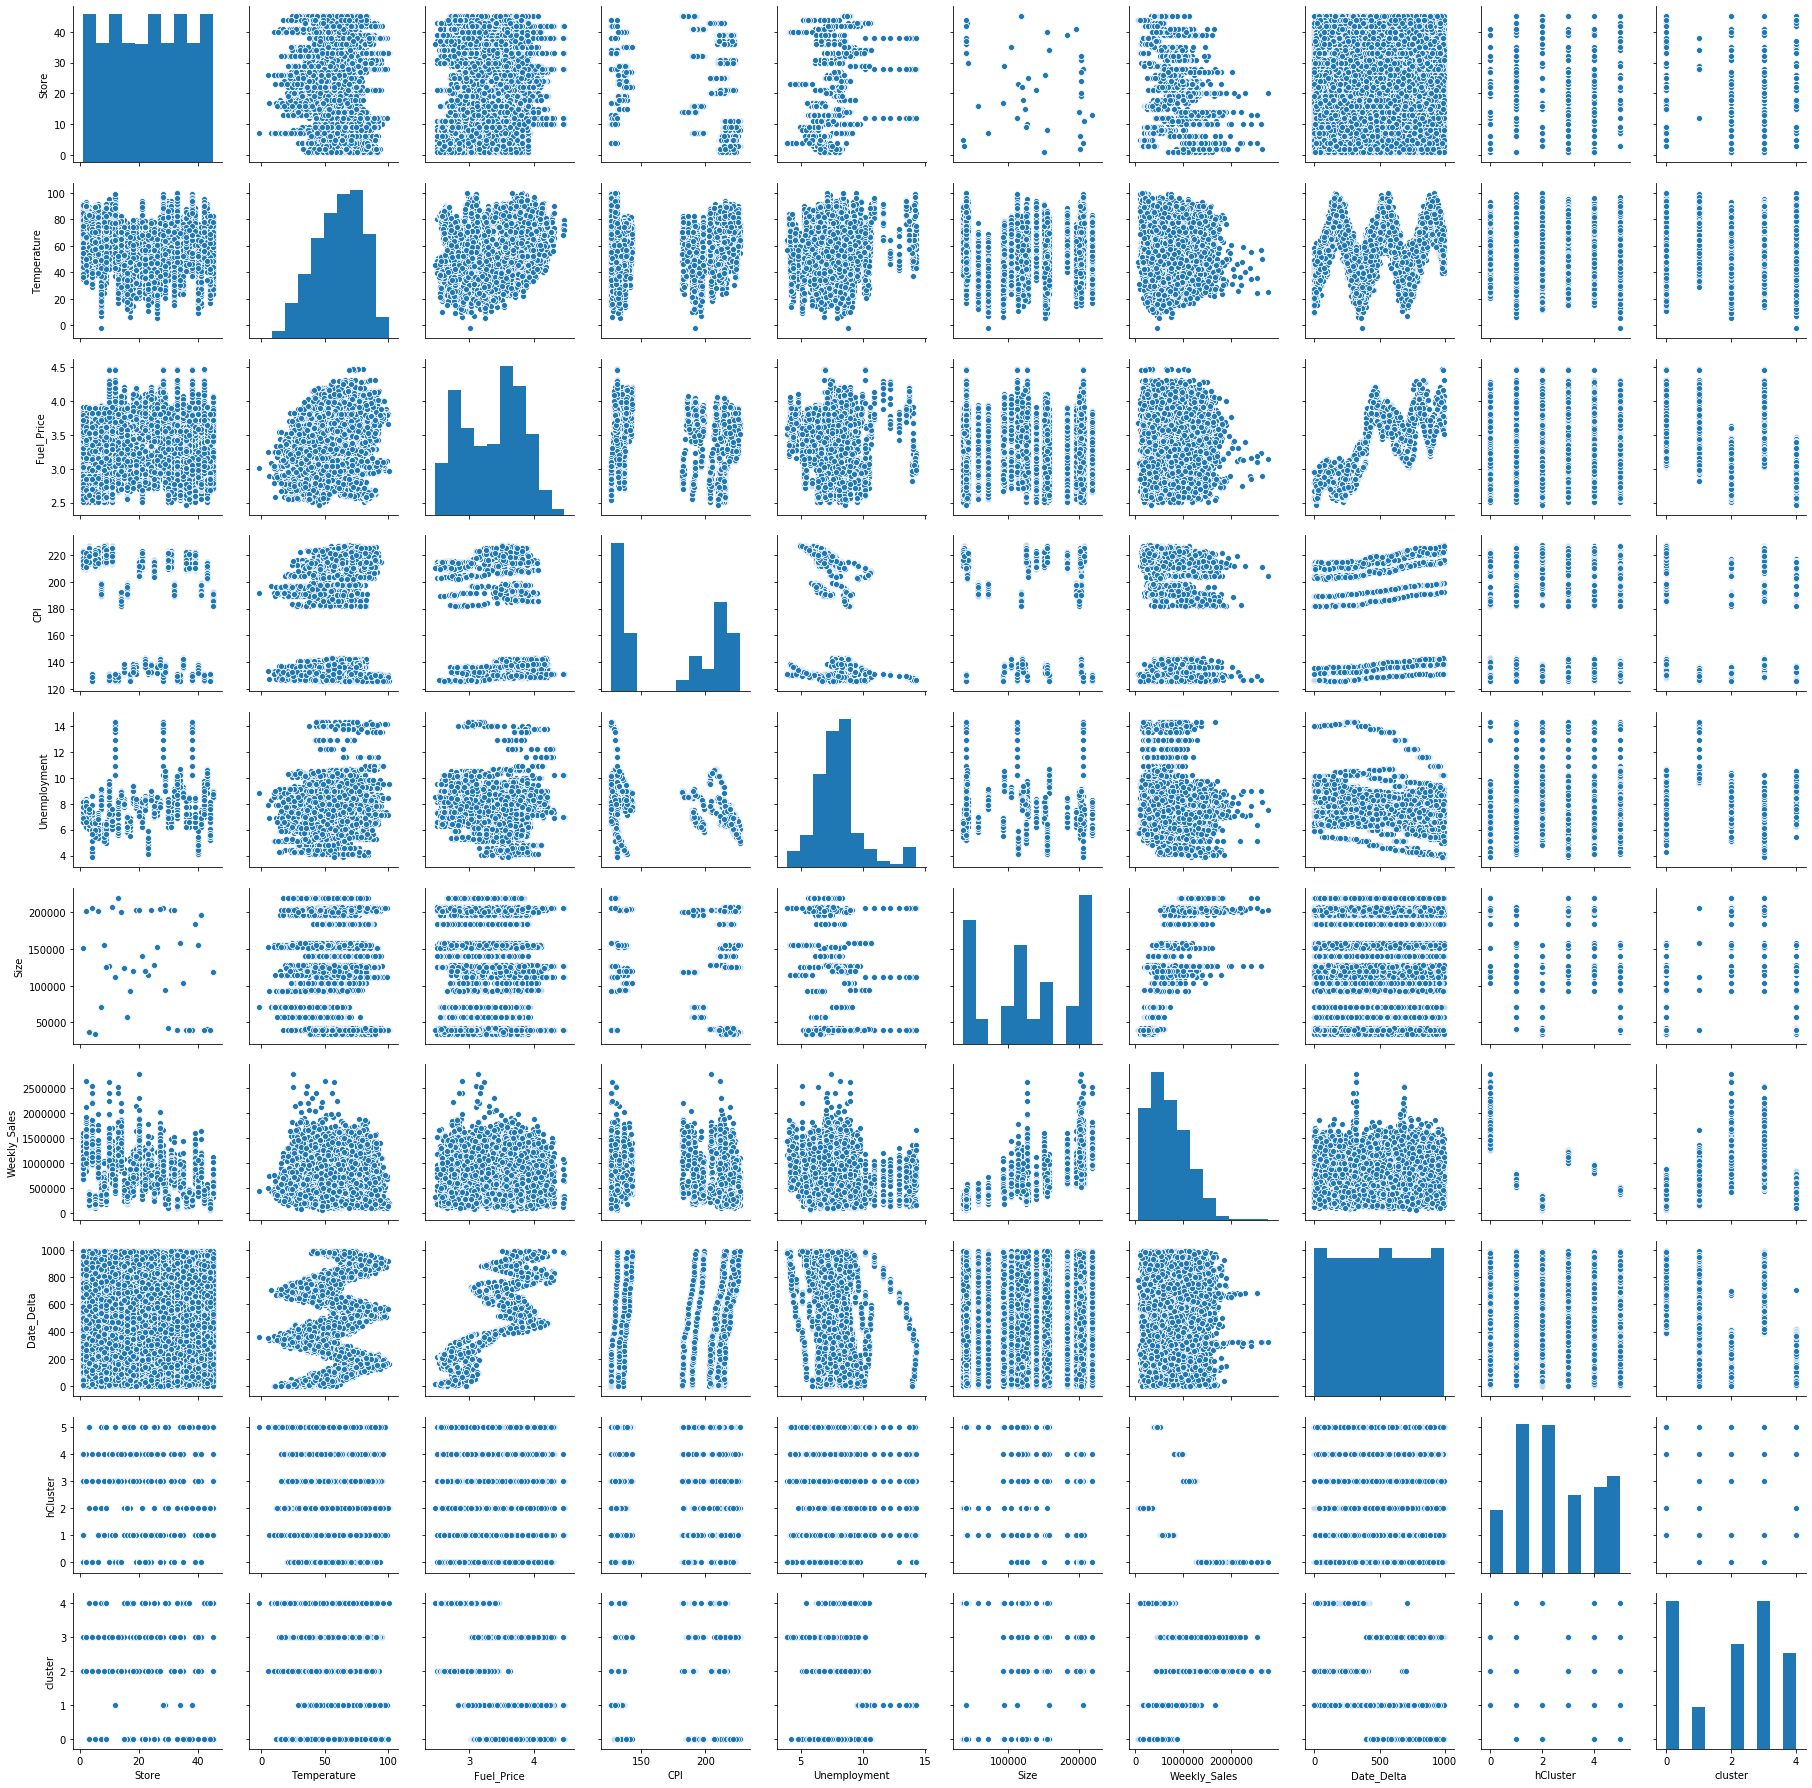

In [193]:
sns.pairplot(dfa.drop('IsHoliday',axis=1))

In [194]:
df.head()

Temperature  Fuel_Price         CPI  Unemployment      Size  Weekly_Sales  \
0        61.10       3.796  136.213613         7.767  152513.0     593115.51   
1        53.11       3.480  128.616064        10.398  158114.0     519134.07   
2        50.43       2.708  211.265543         8.163  140167.0     612096.28   
3        75.32       2.582  214.878556         6.315  155078.0     517038.77   
4        58.81       4.029  138.106581         8.150  203819.0     668089.88   

   Date_Delta  
0         567  
1         413  
2         301  
3         224  
4         833

/Users/annette/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/annette/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


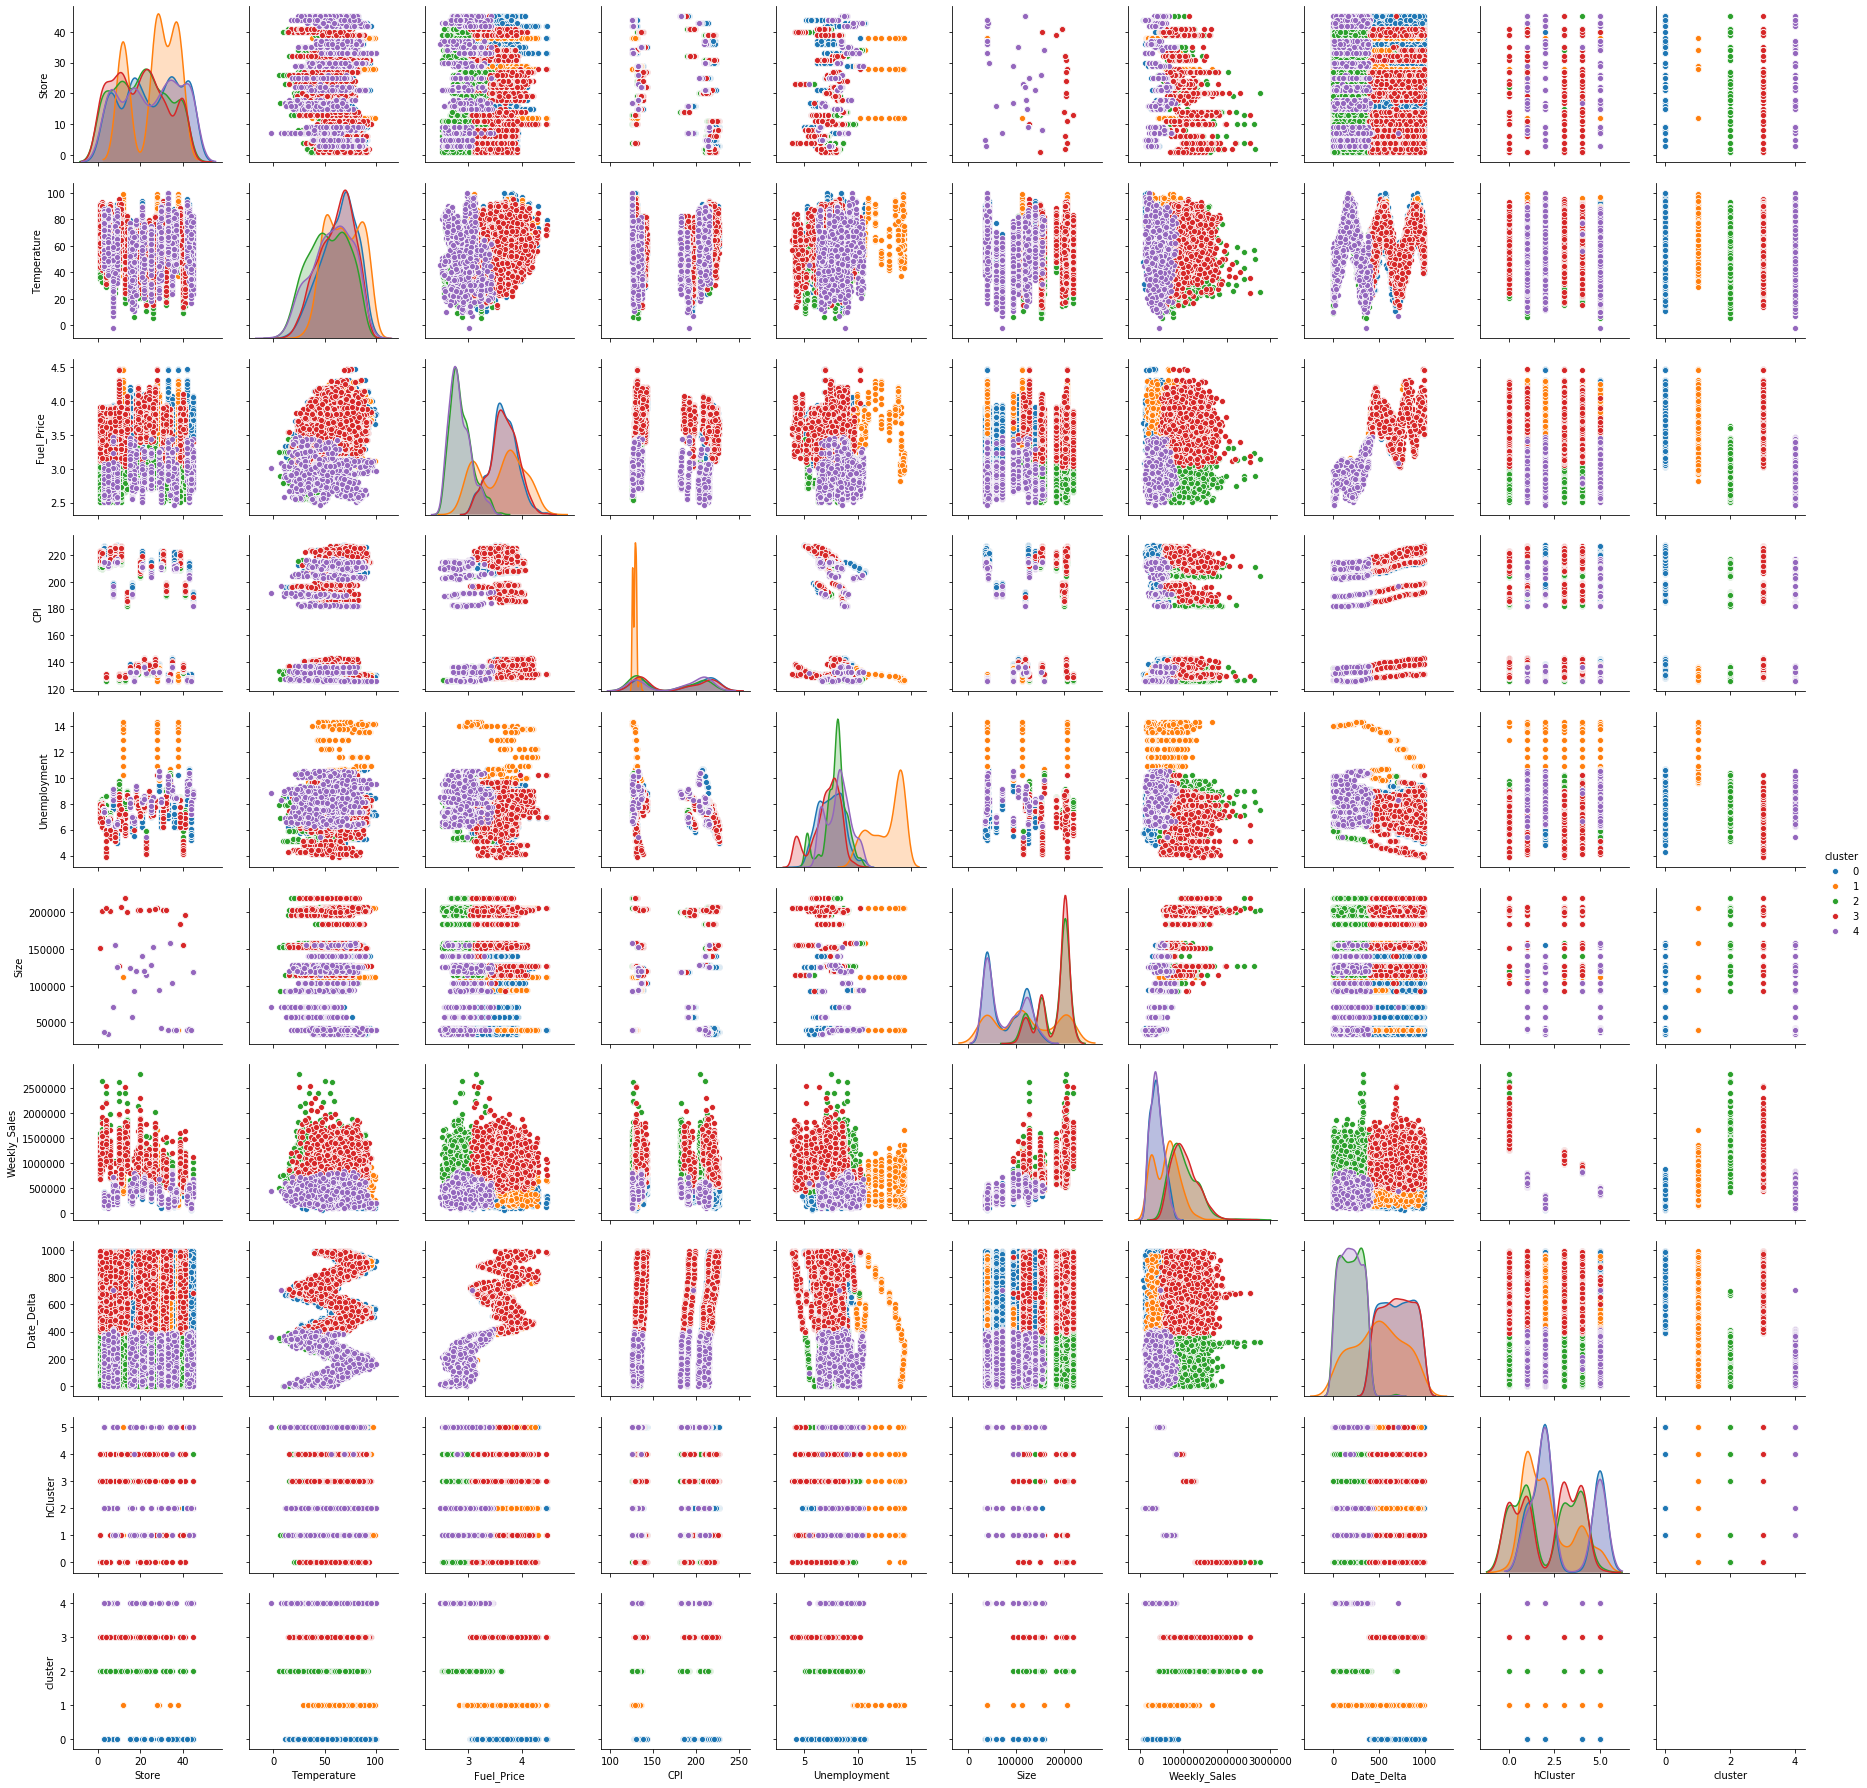

In [195]:
sns.pairplot(dfa.drop('IsHoliday',axis=1), hue='cluster')

# Hierarchical Clustering
### Fuel Price and Weekly Sales

In [181]:
X = dfa[['Weekly_Sales','Fuel_Price']]

In [182]:
X.head()

Weekly_Sales  Fuel_Price
0     593115.51       3.796
1     519134.07       3.480
2     612096.28       2.708
3     517038.77       2.582
4     668089.88       4.029

## Dendogram - Find Optimal Number of Clusters

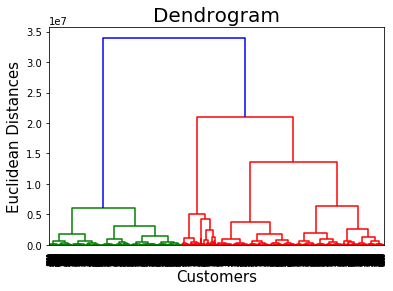

In [183]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as hcd
dendrogram = hcd.dendrogram(hcd.linkage(X, metric='euclidean', method = 'ward'))
plt.title('Dendrogram', size=20)
plt.xlabel('Customers', size=15)
plt.ylabel('Euclidean Distances', size=15)
plt.show()

## Apply Agglomerative Clustering

### n_clusters = 6
***


In [184]:
# Fitting Hierarchical Clustering with 3 Clusters to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
X['Cluster'] = hc.fit_predict(X)

/Users/annette/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [185]:
# Examine new dataframe with cluster column
X.head()

Weekly_Sales  Fuel_Price  Cluster
0     593115.51       3.796        1
1     519134.07       3.480        5
2     612096.28       2.708        1
3     517038.77       2.582        5
4     668089.88       4.029        1

# Visualize Clusters

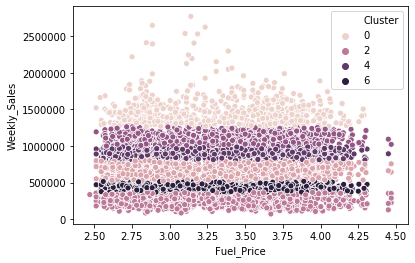

In [186]:
sns.scatterplot(x = "Fuel_Price", y = "Weekly_Sales" , data = X, hue = 'Cluster')

In [187]:
dfa['hCluster'] = X['Cluster']

In [188]:
dfa.drop('cluster', axis=1, inplace = True)

/Users/annette/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/annette/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


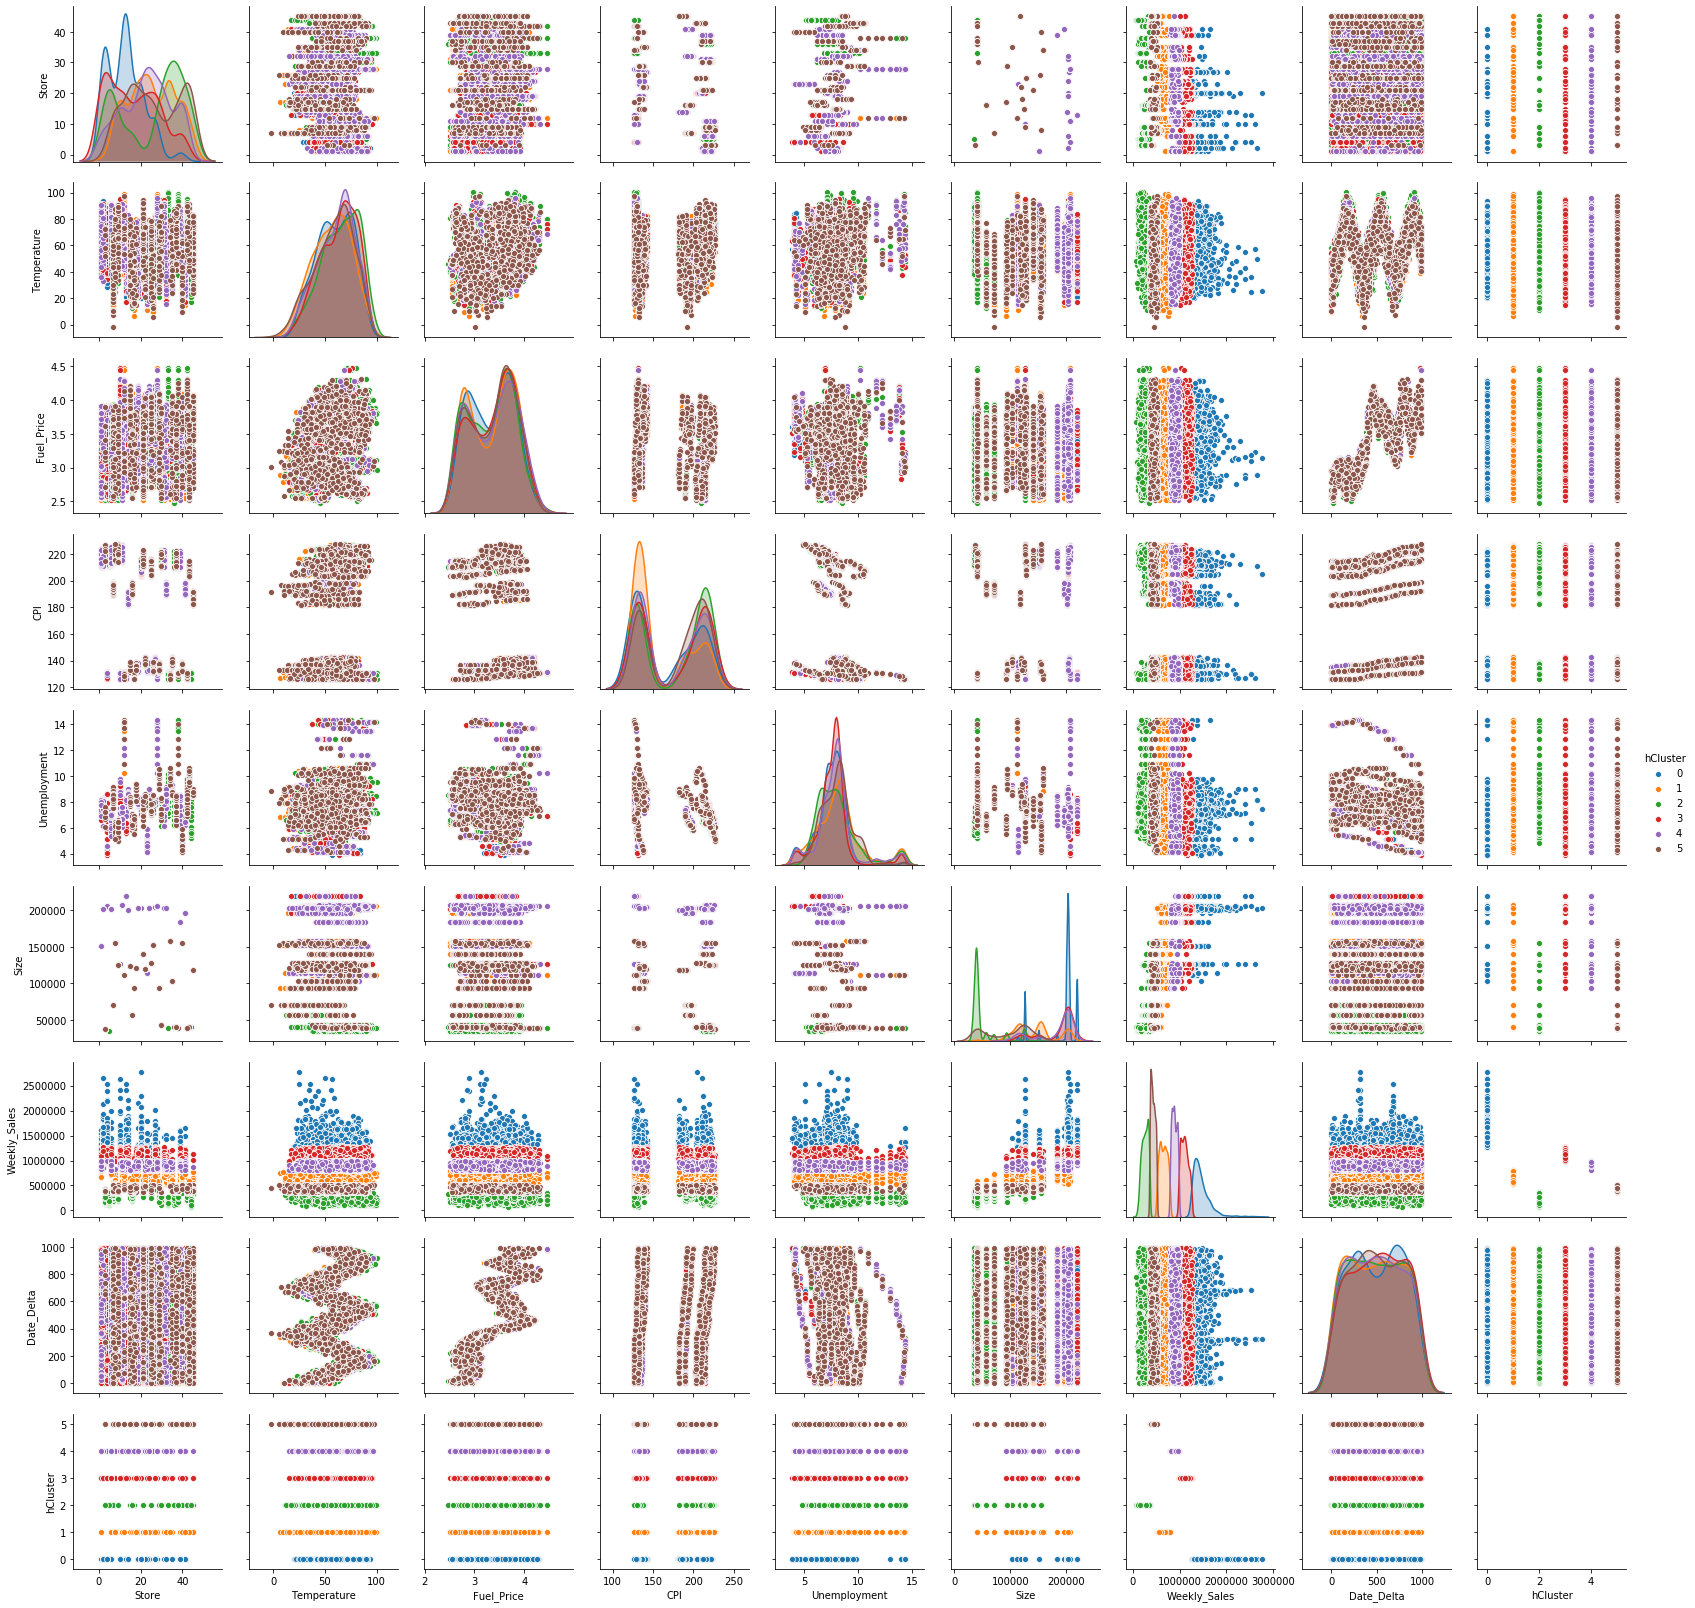

In [189]:
sns.pairplot(dfa.drop('IsHoliday',axis=1), hue='hCluster')